In [24]:
import sys
sys.path.append("..")

import importlib, src.rf_forecasting
importlib.reload(src.rf_forecasting)
from src.rf_forecasting import RandomForestForecaster

import pandas as pd
from src.preprocessing import Preprocessor
from src.rf_forecasting import RandomForestForecaster

Chargement des donées

In [25]:
champs_elysees_df = pd.read_csv('data/traffic/champs_elysees.csv', sep=";")
weather_df = pd.read_csv('data/weather/weather_paris.csv')
holidays_df = pd.read_csv('data/events/french_holidays.csv', sep=";")
football_matches_df = pd.read_csv('data/events/football_matches_2024_2025.csv')

Preprocessing

In [26]:
preprocessor = Preprocessor(df=champs_elysees_df)
df_processed = preprocessor.fit_transform(
    holidays_df=holidays_df,
    weather_df=weather_df,
    sports_df=football_matches_df
)

/Users/remi-moustamsik/Documents/datathon/Datathon-BCG/src/preprocessing.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hour_time'] = df[datetime_col].dt.floor('H')
/Users/remi-moustamsik/Documents/datathon/Datathon-BCG/src/preprocessing.py:139: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['hour_time'] = weather_df['time'].dt.floor('H')
/Users/remi-moustamsik/Documents/datathon/Datathon-BCG/src/preprocessing.py:168: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sports_df['hour_time'] = sports_df['date_paris'].dt.floor('H')
/Users/remi-moustamsik/Documents/datathon/Datathon-BCG/src/preprocessing.py:212: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hour_time'] = df['Date et heure de comptage'].dt.floor('H')


In [27]:
# ...existing code...
tmp = df_processed.copy()
tmp['Débit horaire_lag_1'] = tmp['Débit horaire'].shift(1)
print("shape initiale:", df_processed.shape)
print("shape après lag:", tmp.shape)
print("fraction NaN par colonne (top 30):")
print(tmp.isna().mean().sort_values(ascending=False).head(30))
print("lignes avec au moins 1 NaN:", tmp.isna().any(axis=1).sum())
print("lignes avec NaN dans les targets:", tmp[['Débit horaire','Taux d\'occupation']].isna().any(axis=1).sum())
# display un échantillon de lignes ayant NaN hors cibles
display(tmp[tmp.isna().any(axis=1) & ~tmp[['Débit horaire','Taux d\'occupation']].isna().any(axis=1)].head())

shape initiale: (8627, 43)
shape après lag: (8627, 44)
fraction NaN par colonne (top 30):
sport_event_name             0.969746
relative_humidity_2m (%)     0.827402
temperature_2m (°C)          0.827402
rain (mm)                    0.827402
apparent_temperature (°C)    0.827402
cloud_cover (%)              0.827402
surface_pressure (hPa)       0.827402
weather_code (wmo code)      0.827402
wind_speed_10m (km/h)        0.827402
precipitation (mm)           0.827402
time                         0.827402
holiday_name                 0.624319
Débit horaire_lag_1          0.000116
Libelle                      0.000000
is_sport_event               0.000000
is_holiday                   0.000000
dayofyear_cos                0.000000
dayofyear_sin                0.000000
day_of_year                  0.000000
month_cos                    0.000000
month_sin                    0.000000
weekday_cos                  0.000000
Identifiant arc              0.000000
hour_cos                     0.00000

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,...,precipitation (mm),wind_speed_10m (km/h),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),apparent_temperature (°C),rain (mm),sport_event_name,is_sport_event,Débit horaire_lag_1
Date et heure de comptage,,,,,,,,,,,,,,,,,,,,,
2024-10-01 05:00:00,4264,AV_Champs_Elysees,259.0,2.99667,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2024-10-01 06:00:00,4264,AV_Champs_Elysees,330.0,4.98167,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,259.0
2024-10-01 07:00:00,4264,AV_Champs_Elysees,618.0,7.00500,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,330.0
2024-10-01 08:00:00,4264,AV_Champs_Elysees,1018.0,11.30722,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,618.0
2024-10-01 09:00:00,4264,AV_Champs_Elysees,1275.0,14.72667,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1018.0


Instanciation forecaster Rf

In [28]:
rf_forecaster = RandomForestForecaster(
    target_cols=["Débit horaire", "Taux d'occupation"],
    lags=[1],
    rolling_windows=[],
    train_ratio=0.8,
)

In [30]:
# diagnostic (notebook)
X_train, X_test, y_train, y_test = rf_forecaster.prepare_data(df_processed)
print("Non-numeric in X_train:", X_train.select_dtypes(exclude=[float, int]).columns.tolist())
# détecter colonnes numériques qui contiennent des strings
for c in X_train.select_dtypes(include=['object','string']).columns:
    n_nonnum = X_train[c].apply(lambda v: pd.to_numeric(v, errors='coerce')).isna().sum()
    print(c, "non-convertibles:", n_nonnum)

[RF] input df shape: (8627, 43)
[RF] max_lag=1 max_roll=24 required_rows=25 len(df)=8627
[RF] shape before dropping target-NaN: (8627, 49) -> after: (8627, 49)
[RF] shape after dropping sparse columns: (8627, 37)
[RF] dropping non-numeric columns before finalizing X: ['Libelle', 'Etat trafic', 'Libelle noeud amont', 'Libelle noeud aval', 'Etat arc', 'Date debut dispo data', 'Date fin dispo data', 'geo_point_2d', 'geo_shape', 'date', 'is_weekend', 'is_holiday', 'is_sport_event']
[RF] final X shape: (8627, 22), y shape: (8627, 2)
[RF] X_train: (6901, 22), X_test: (1726, 22)
Non-numeric in X_train: []


Entrainement/évaluation

In [31]:
# Préparation des données
X_train, X_test, y_train, y_test = rf_forecaster.prepare_data(df_processed)

# Entraînement
rf_forecaster.train(X_train, y_train)

# Évaluation
y_test_df, y_pred_df = rf_forecaster.evaluate(X_test, y_test)

[RF] input df shape: (8627, 43)
[RF] max_lag=1 max_roll=24 required_rows=25 len(df)=8627
[RF] shape before dropping target-NaN: (8627, 49) -> after: (8627, 49)
[RF] shape after dropping sparse columns: (8627, 37)
[RF] dropping non-numeric columns before finalizing X: ['Libelle', 'Etat trafic', 'Libelle noeud amont', 'Libelle noeud aval', 'Etat arc', 'Date debut dispo data', 'Date fin dispo data', 'geo_point_2d', 'geo_shape', 'date', 'is_weekend', 'is_holiday', 'is_sport_event']
[RF] final X shape: (8627, 22), y shape: (8627, 2)
[RF] X_train: (6901, 22), X_test: (1726, 22)
[RF] Entraînement terminé pour cibles : ['Débit horaire', "Taux d'occupation"]
Débit horaire : RMSE = 81.90, Mean = 739.04, Relative error = 11.08%
Taux d'occupation : RMSE = 4.51, Mean = 16.53, Relative error = 27.25%


Visualisation

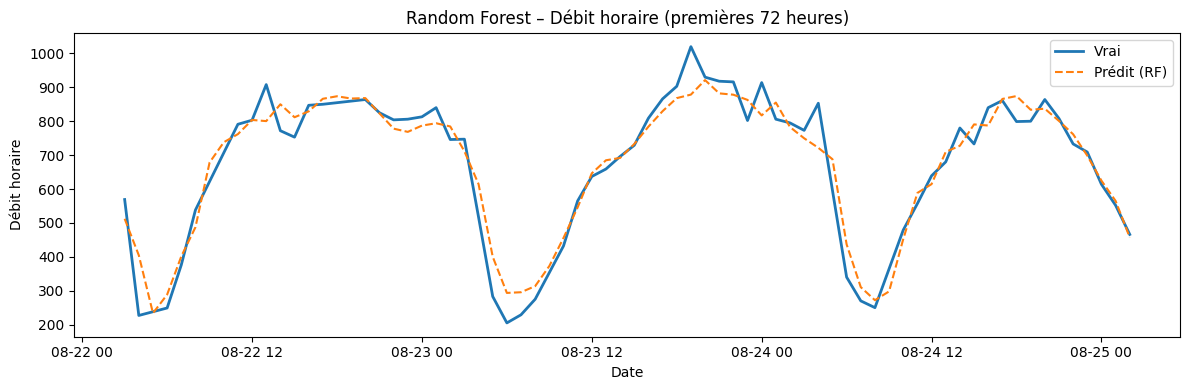

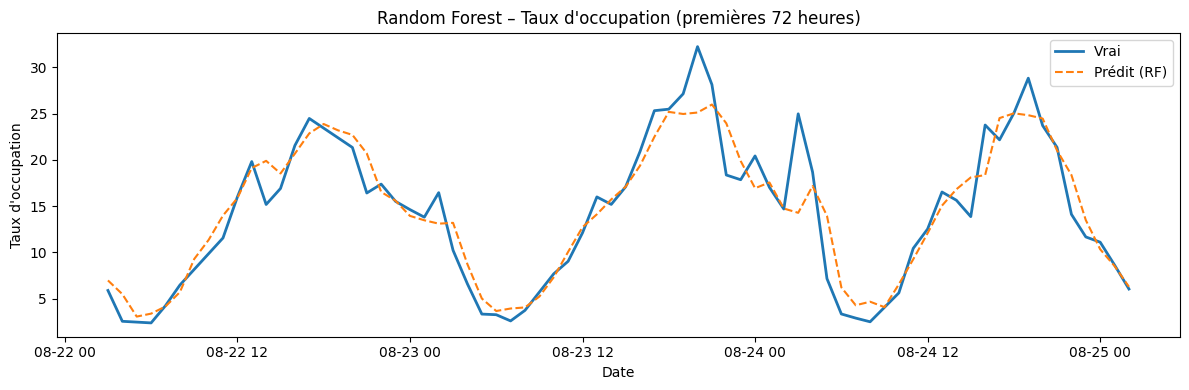

In [32]:
rf_forecaster.plot_predictions(y_test_df, y_pred_df, n_plot=72)

In [33]:
# Préparez X,y via rf_forecaster.prepare_data (ou utilisez df_processed transformé)
X_train, X_test, y_train, y_test = rf_forecaster.prepare_data(df_processed)
# Lance CV sur l'ensemble d'entraînement (ou sur X,y)
scores = rf_forecaster.cross_validate(X_train, y_train, n_splits=5, refit=True, random_state=42)

[RF] input df shape: (8627, 43)
[RF] max_lag=1 max_roll=24 required_rows=25 len(df)=8627
[RF] shape before dropping target-NaN: (8627, 49) -> after: (8627, 49)
[RF] shape after dropping sparse columns: (8627, 37)
[RF] dropping non-numeric columns before finalizing X: ['Libelle', 'Etat trafic', 'Libelle noeud amont', 'Libelle noeud aval', 'Etat arc', 'Date debut dispo data', 'Date fin dispo data', 'geo_point_2d', 'geo_shape', 'date', 'is_weekend', 'is_holiday', 'is_sport_event']
[RF] final X shape: (8627, 22), y shape: (8627, 2)
[RF] X_train: (6901, 22), X_test: (1726, 22)
[RF CV] fold 1: train=1151 val=1150
[RF CV] fold 2: train=2301 val=1150
[RF CV] fold 3: train=3451 val=1150
[RF CV] fold 4: train=4601 val=1150
[RF CV] fold 5: train=5751 val=1150
[RF CV] Débit horaire RMSE per fold: [89.966, 102.055, 94.316, 90.878, 85.552] mean=92.554 std=5.512
[RF CV] Taux d'occupation RMSE per fold: [5.389, 3.597, 3.228, 4.041, 4.437] mean=4.138 std=0.746
[RF CV] final models refit on full data
